In [1]:
import os
import yaml
from pathlib import Path
from PIL import Image
from scipy.ndimage import gaussian_filter

import numpy as np
import skimage

from src.utils import *
from src.wsi_reader import WSIReader

In [2]:
config = load_config()
config

{'dataset_path': '/Users/cmkim/workspace/datasets/TIGER/'}

In [3]:
rgb = WSIReader(
    path=Path(config["dataset_path"]) / "wsibulk/images" / "119S.tif"
).read_array(
    level=32
)

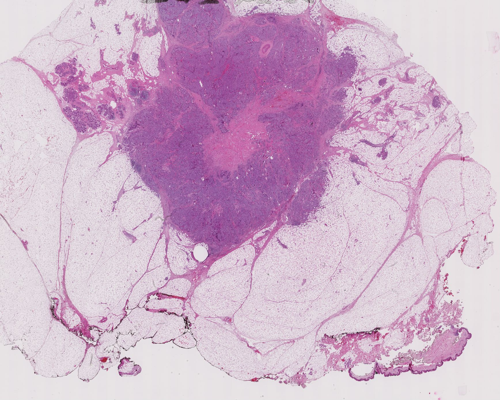

In [4]:
Image.fromarray(rgb).resize((500, 400))

초기 조명맵을 설정하는 과정에서 각 pixel에서 channel별로 max값을 이용하여 설정함 (shape = (width, height))
* rgb2hed 로 바뀐 이미지에서 max값을 이용해요 초기 조명맵을 만드는게 맞을까?
* 우선 전체적인 코드를 짜보고 이상한 부분을 수정하고자 함

In [5]:
rgb_f = skimage.util.img_as_float(rgb, force_copy=True)

In [6]:
rgb_f

array([[[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       [[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       [[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       ...,

       [[0.91764706, 0.90196078, 0.90588235],
        [0.91764706, 0.90196078, 0.90588235],
        [0.91764706, 0

In [7]:
tmap = np.max(rgb_f, axis=2)
tmap

array([[0.90980392, 0.90980392, 0.90980392, ..., 0.90980392, 0.90196078,
        0.90196078],
       [0.90980392, 0.90980392, 0.90980392, ..., 0.90980392, 0.90196078,
        0.90196078],
       [0.90980392, 0.90980392, 0.90980392, ..., 0.90980392, 0.90196078,
        0.90196078],
       ...,
       [0.91764706, 0.91764706, 0.91764706, ..., 0.90980392, 0.90196078,
        0.90196078],
       [0.89803922, 0.89803922, 0.89803922, ..., 0.89803922, 0.89019608,
        0.89019608],
       [0.90588235, 0.90588235, 0.90588235, ..., 0.90980392, 0.90196078,
        0.90196078]], shape=(1356, 1736))

In [8]:
tmap_gradh = np.abs(np.gradient(tmap, axis=1))
tmap_gradv = np.abs(np.gradient(tmap, axis=0))

In [24]:
tmap_gradh

array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.        ]], shape=(1356, 1736))

In [25]:
tmap_gradv

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00196078, 0.00196078,
        0.00196078],
       [0.00588235, 0.00588235, 0.00588235, ..., 0.        , 0.        ,
        0.        ],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.01176471, 0.01176471,
        0.01176471]], shape=(1356, 1736))

In [10]:
epsilon = 1e-5

In [11]:
gaussian = gaussian_filter(tmap, sigma=2)
gaussian

array([[0.90980392, 0.90980392, 0.90980392, ..., 0.90675467, 0.9054019 ,
        0.90452915],
       [0.90980392, 0.90980392, 0.90980392, ..., 0.90675467, 0.9054019 ,
        0.90452915],
       [0.90980392, 0.90980392, 0.90980392, ..., 0.90675467, 0.9054019 ,
        0.90452915],
       ...,
       [0.90675052, 0.90675077, 0.90675205, ..., 0.90295975, 0.90161371,
        0.90074228],
       [0.9062005 , 0.90620049, 0.90620042, ..., 0.90261641, 0.90127338,
        0.90040255],
       [0.90573827, 0.90573817, 0.90573765, ..., 0.90252629, 0.9011852 ,
        0.90031475]], shape=(1356, 1736))

In [12]:
wh = np.sum(gaussian / (gaussian * tmap_gradh + epsilon), axis=1, keepdims=True)
wv = np.sum(gaussian / (gaussian * tmap_gradv + epsilon), axis=0, keepdims=True)

In [13]:
wh, wv

(array([[5.74763811e+07],
        [5.85015751e+07],
        [5.77317928e+07],
        ...,
        [1.36815942e+08],
        [1.31769898e+08],
        [1.33567398e+08]], shape=(1356, 1)),
 array([[3.73423271e+07, 3.71708531e+07, 3.71604008e+07, ...,
         1.02207920e+08, 1.04134627e+08, 1.01897357e+08]], shape=(1, 1736)))

In [15]:
tmap_adj = tmap / (wh + wv + epsilon)
tmap_adj

array([[9.59519423e-09, 9.61257800e-09, 9.61363968e-09, ...,
        5.69751640e-09, 5.58106033e-09, 5.65940660e-09],
       [9.49255927e-09, 9.50957281e-09, 9.51061185e-09, ...,
        5.66117094e-09, 5.54587955e-09, 5.62323436e-09],
       [9.56941724e-09, 9.58670765e-09, 9.58776363e-09, ...,
        5.68841789e-09, 5.57225389e-09, 5.65035137e-09],
       ...,
       [5.26904101e-09, 5.27423395e-09, 5.27455082e-09, ...,
        3.80633095e-09, 3.74334367e-09, 3.77842705e-09],
       [5.31031519e-09, 5.31570513e-09, 5.31603403e-09, ...,
        3.83813827e-09, 3.77354390e-09, 3.80967406e-09],
       [5.30035581e-09, 5.30567900e-09, 5.30600383e-09, ...,
        3.85877509e-09, 3.79450191e-09, 3.83055539e-09]],
      shape=(1356, 1736))

In [16]:
tmap_adj = np.power(tmap_adj, 0.6)
tmap_adj

array([[1.54608107e-05, 1.54776110e-05, 1.54786366e-05, ...,
        1.13086653e-05, 1.11694048e-05, 1.12632193e-05],
       [1.53613714e-05, 1.53778849e-05, 1.53788930e-05, ...,
        1.12653259e-05, 1.11271069e-05, 1.12199704e-05],
       [1.54358765e-05, 1.54526045e-05, 1.54536258e-05, ...,
        1.12978264e-05, 1.11588268e-05, 1.12524029e-05],
       ...,
       [1.07904349e-05, 1.07968144e-05, 1.07972035e-05, ...,
        8.87777079e-06, 8.78933101e-06, 8.83866401e-06],
       [1.08410708e-05, 1.08476716e-05, 1.08480743e-05, ...,
        8.92220854e-06, 8.83180851e-06, 8.88244838e-06],
       [1.08288669e-05, 1.08353909e-05, 1.08357889e-05, ...,
        8.95096131e-06, 8.86120666e-06, 8.91162797e-06]],
      shape=(1356, 1736))

In [17]:
tmap_adj = (tmap_adj - np.min(tmap_adj)) / (np.max(tmap_adj) - np.min(tmap_adj))
tmap_adj

array([[0.16876977, 0.16898806, 0.16900138, ..., 0.11481995, 0.1130105 ,
        0.11422946],
       [0.16747773, 0.16769229, 0.16770539, ..., 0.11425683, 0.11246092,
        0.11366752],
       [0.16844579, 0.16866314, 0.16867641, ..., 0.11467912, 0.11287306,
        0.11408892],
       ...,
       [0.10808646, 0.10816935, 0.1081744 , ..., 0.08323476, 0.08208564,
        0.08272663],
       [0.10874438, 0.10883015, 0.10883538, ..., 0.08381215, 0.08263756,
        0.08329553],
       [0.10858581, 0.10867058, 0.10867575, ..., 0.08418574, 0.08301953,
        0.08367467]], shape=(1356, 1736))

In [21]:
rgb_ajd = rgb_f * tmap_adj[..., np.newaxis]

In [22]:
rgb_f

array([[[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       [[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       [[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       ...,

       [[0.91764706, 0.90196078, 0.90588235],
        [0.91764706, 0.90196078, 0.90588235],
        [0.91764706, 0

In [23]:
rgb_ajd

array([[[0.1535474 , 0.15023818, 0.15288555],
        [0.153746  , 0.15043251, 0.1530833 ],
        [0.15375812, 0.15044437, 0.15309537],
        ...,
        [0.10446364, 0.10266254, 0.10311282],
        [0.10193104, 0.10104469, 0.10148786],
        [0.10303049, 0.10213457, 0.10258253]],

       [[0.15237189, 0.14908802, 0.15171512],
        [0.1525671 , 0.14927902, 0.15190949],
        [0.15257902, 0.14929068, 0.15192135],
        ...,
        [0.10395131, 0.10215905, 0.10260711],
        [0.10143534, 0.10055329, 0.10099431],
        [0.10252364, 0.10163213, 0.10207789]],

       [[0.15325264, 0.14994978, 0.15259207],
        [0.15345039, 0.15014327, 0.15278896],
        [0.15346246, 0.15015508, 0.15280098],
        ...,
        [0.10433551, 0.10253662, 0.10298634],
        [0.10180708, 0.1009218 , 0.10136444],
        [0.10290373, 0.10200892, 0.10245632]],

       ...,

       [[0.09918522, 0.09748975, 0.09791361],
        [0.09926128, 0.09756451, 0.0979887 ],
        [0.09926592, 0